In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

In [2]:
%matplotlib notebook

In [3]:
filenames = [f for f in glob.glob("*.fits")]
filenames = list(np.array(filenames)[np.where(np.array([len(s.split('f')) for s in filenames]) == 2)[0]])
len(filenames)

106

In [4]:
SPECTRA = [fits.open(f) for f in filenames]

In [6]:
SPECTRA[0][1].data[80][12]

array([7599.05313232, 7599.07056818, 7599.08800305, ..., 7710.22688885,
       7710.2378499 , 7710.2488103 ])

In [5]:
SPECTRA[0][0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 7920                                                  
NAXIS2  =                   86                                                  
EXTEND  =                    T                                                  
SITELONG= '-111.422515'        / East longitude site, decimal degrees           
SITELAT = '34.744305'          / Latitude of site, decimal degrees              
SITEELEV= '2337.0  '           / Elevation of observatory site (meters)         
TELESCP = 'DCT     '           / Name of telescope                              
INSTRMNT= 'EXPRES  '           / Name of instrument                             
DETECTOR= 'STA1600 '           / Detector type                                  
FPA     = 'EXPRES-D0'       

In [5]:
times = [fits.open(s)[0].header['MIDPOINT'] for s in filenames]

<IPython.core.display.Javascript object>


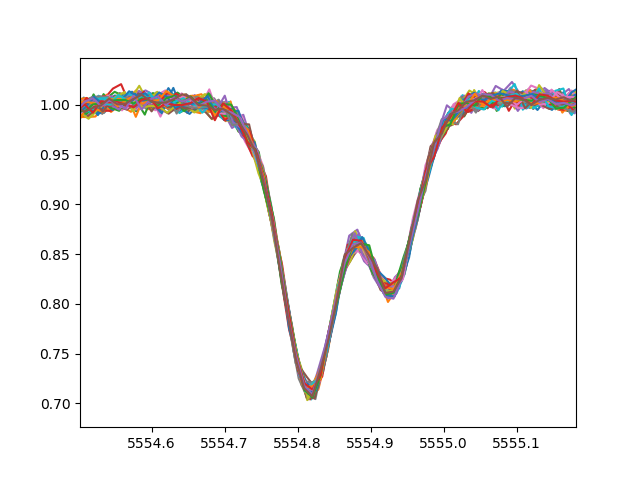

In [6]:
for i in range(len(SPECTRA)):
    plt.plot(SPECTRA[i][1].data[50][12], SPECTRA[i][0].data[50,:])
plt.show()

## How similar are these spectra to SOAP?

In [7]:
soap = pd.read_csv("../SOAP_1pct/integrated_spectrum_full_reso_spot_prot_25.0_size_0.010_lat_0_phase_-0.5000.csv")
soap["Flux"] = soap.Flux.values/np.max(soap.Flux.values)

<IPython.core.display.Javascript object>


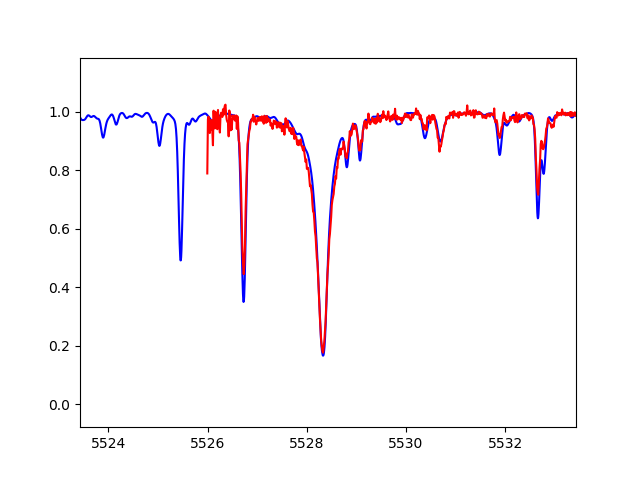

In [8]:
plt.plot(soap.Wavelength.values, soap.Flux.values, c='b')
doppfact = np.sqrt((1-71700/299792458)/(1+71700/299792458))
#for i in range(len(SPECTRA[0][1].data)):
plt.plot(doppfact*SPECTRA[0][1].data[50][12], SPECTRA[0][0].data[50,:], c='r')
plt.xlim(5560, 5570)
#plt.ylim(0,1)
plt.show()

## How do the tellurics look?

<IPython.core.display.Javascript object>


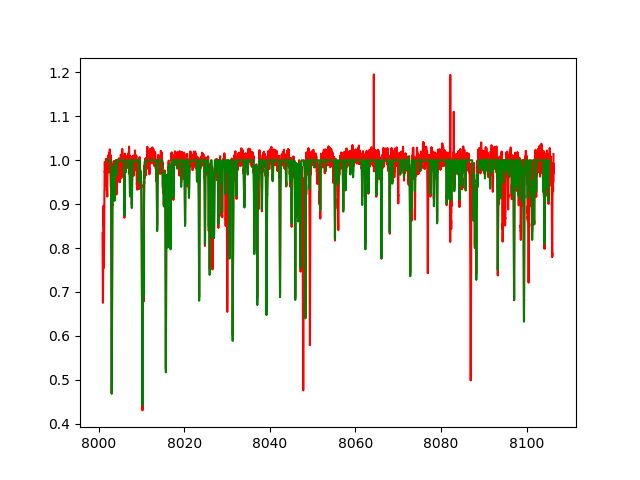

In [9]:
od = 84
plt.plot(SPECTRA[0][1].data[od][12], SPECTRA[0][0].data[od,:], c='r')
plt.plot(SPECTRA[0][1].data[od][12],SPECTRA[0][1].data[od][10], c='g')
plt.show()